# 1.Setup

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

## 1.1 Create Helper Functions

In [61]:
def create_question_feature(text_series):
    """
    Membuat fitur biner yang menandakan apakah sebuah teks mengandung tanda tanya '?'.
    Menggunakan metode .str.contains() yang lebih efisien.
    """
    # regex=False memastikan pencarian literal untuk '?'
    return text_series.str.contains('?', regex=False).astype(int).values.reshape(-1, 1)

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    """
    Membuat dan menampilkan plot confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 2.Load Dataset

In [ ]:
FILE_PATH = "tweet_bersih.csv"
df = pd.read_csv(FILE_PATH)

TEST_SIZE = 0.15
RANDOM_STATE = 16

try:
    df = pd.read_csv(FILE_PATH)
    print('Dataset berhasil dimuat')
    print(f'Jumlah data: {len(df)} baris')
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di '{FILE_PATH}'. Pastikan path sudah benar")
    exit()

Dataset berhasil dimuat
Jumlah data: 1815 baris


# 3.Preparing Data

In [63]:
X_text = df['tweet_bersih'].fillna('')
y = df['sentimen']

X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_text, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y
)

# 4. Create and Train the Model using a Pipeline

In [ ]:
print("\n--- Menggunakan scikit-learn Pipeline ---")

# Mendefinisikan pipeline untuk ekstraksi fitur gabungan
feature_extraction = FeatureUnion([
    ('tfidf', TfidfVectorizer(max_features=800, min_df=5, ngram_range=(1, 3))),
    ('question_feature', FunctionTransformer(create_question_feature, validate=False))
])

# Buat pipeline utama yang menggabungkan ekstraksi fitur dan classifier
model_pipeline = Pipeline([
    ('features', feature_extraction),
    ('classifier', SVC(kernel='linear', probability=True, random_state=RANDOM_STATE))
])

# Melatih pipeline dengan data training mentah
print("Memulai training model...")
model_pipeline.fit(X_text_train, y_train)
print("Training selesai!")



--- Menggunakan scikit-learn Pipeline ---
Memulai training model...
Training selesai!


# 5. Prediction and Evaluate the Model


--- Hasil Evaluasi Model SVC (via Pipeline) ---
Akurasi Data Latih : 0.8119
Akurasi Data Uji   : 0.6520

Laporan Klasifikasi Data Uji:
              precision    recall  f1-score   support

     negatif       0.61      0.71      0.66        90
      netral       0.67      0.62      0.64        91
     positif       0.69      0.63      0.66        92

    accuracy                           0.65       273
   macro avg       0.66      0.65      0.65       273
weighted avg       0.66      0.65      0.65       273



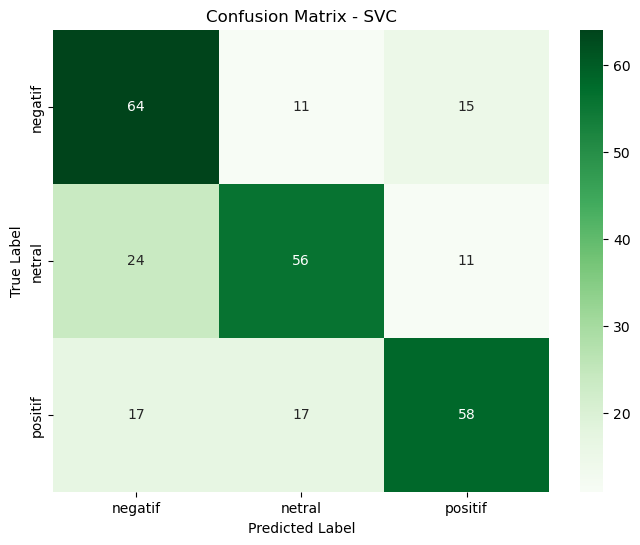

In [66]:
y_pred_test = model_pipeline.predict(X_text_test)
y_pred_train = model_pipeline.predict(X_text_train)

# Menampilkan hasil evaluasi
print("\n--- Hasil Evaluasi Model SVC (via Pipeline) ---")
print(f"Akurasi Data Latih : {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Akurasi Data Uji   : {accuracy_score(y_test, y_pred_test):.4f}")

print("\nLaporan Klasifikasi Data Uji:")
print(classification_report(y_test, y_pred_test))

plot_confusion_matrix(y_test, y_pred_test, classes=model_pipeline.classes_, title='Confusion Matrix - SVC')